In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
car_price=pd.read_csv("car data.csv")

In [3]:
car_price

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
car_price.shape

(301, 9)

In [5]:
car_price.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [6]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
#number of missing values
car_price.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
print(car_price.Fuel_Type.value_counts())
print(car_price.Selling_type.value_counts())
print(car_price.Transmission.value_counts())
print(car_price.Car_Name.value_counts())


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64


# encoding catagorical to numerical data

In [9]:
car_price.replace({'Fuel_Type':{'Petrol':1,'Diesel':2,'CNG':3}},inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16988\170275863.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_price.replace({'Fuel_Type':{'Petrol':1,'Diesel':2,'CNG':3}},inplace=True)


In [10]:
car_price.replace({'Selling_type':{'Dealer':11,'Individual':22}},inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16988\2894131417.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_price.replace({'Selling_type':{'Dealer':11,'Individual':22}},inplace=True)


In [11]:
car_price.replace({'Transmission':{'Manual':13,'Automatic':14}},inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16988\1889553856.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_price.replace({'Transmission':{'Manual':13,'Automatic':14}},inplace=True)


In [23]:
car_price.head(44)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,11,13,0
1,sx4,2013,4.75,9.54,43000,2,11,13,0
2,ciaz,2017,7.25,9.85,6900,1,11,13,0
3,wagon r,2011,2.85,4.15,5200,1,11,13,0
4,swift,2014,4.60,6.87,42450,2,11,13,0
5,vitara brezza,2018,9.25,9.83,2071,2,11,13,0
6,ciaz,2015,6.75,8.12,18796,1,11,13,0
7,s cross,2015,6.50,8.61,33429,2,11,13,0
8,ciaz,2016,8.75,8.89,20273,2,11,13,0
9,ciaz,2015,7.45,8.92,42367,2,11,13,0


# Splitting the data for the target

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [25]:
X=car_price.drop(['Car_Name','Selling_Price'],axis=1)
y=car_price['Selling_Price']

In [26]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          1            11            13   
1    2013           9.54       43000          2            11            13   
2    2017           9.85        6900          1            11            13   
3    2011           4.15        5200          1            11            13   
4    2014           6.87       42450          2            11            13   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          2            11            13   
297  2015           5.90       60000          1            11            13   
298  2009          11.00       87934          1            11            13   
299  2017          12.50        9000          2            11            13   
300  2016           5.90        5464          1            11            13   

     Owner  
0        0  
1        0  
2        0  

In [16]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# Splitting the data into train and test

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)

# train the model

In [18]:
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.neural_network import MLPRegressor

from xgboost import XGBRegressor

In [19]:
svr=SVR()
lr=LinearRegression()
ls=Lasso()
sgd=SGDRegressor()
knn=KNeighborsRegressor()
gpr=GaussianProcessRegressor()
dtr=DecisionTreeRegressor()
gbr=GradientBoostingRegressor()
rfr=RandomForestRegressor()
mlp=MLPRegressor()
xgb=XGBRegressor()
ir=IsotonicRegression()

In [20]:
models = {
          "a": ["SVR", svr],
          "b": ["LinearRegression", lr],
          "l": ["Lasso",ls],
          "c": ["SGDRegressor", sgd],
          "d": ["KNeighborsRegressor", knn],
          "e": ["GaussianProcessRegressor", gpr],
          "f": ["DecisionTreeRegressor", dtr],
          "g": ["GradientBoostingRegressor", gbr],
          "h": ["RandomForestRegressor", rfr],
          "i": ["XGBRegressor", xgb],
          "j": ["MLPRegressor", mlp],
          "k": ["IsotonicRegression",ir]}

In [21]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model (model, X_train=X_train, y_train=y_train):
    cv=KFold(n_splits = 7, shuffle=True, random_state = 2)
    r2_scorer = make_scorer(r2_score)
    r2_val_score = cross_val_score (model, X_train, y_train, cv=cv, scoring = r2_scorer)
    score = [r2_val_score.mean()]

    return score

In [22]:
import warnings
warnings.filterwarnings('ignore')
models_score = []
for model in models:
    print("Training model: ", models [model][0])
    score = test_model(models [model] [1], X_train, y_train)
    print("Score of model: ", score)
    models_score.append([models [model] [0], score [0]])

Training model:  SVR
Score of model:  [-0.12578805751818817]
Training model:  LinearRegression
Score of model:  [0.8232900751013329]
Training model:  Lasso
Score of model:  [0.7957430613477608]
Training model:  SGDRegressor
Score of model:  [-1.3051738935074652e+35]
Training model:  KNeighborsRegressor
Score of model:  [-0.20371573666647982]
Training model:  GaussianProcessRegressor
Score of model:  [-0.7053751924557515]
Training model:  DecisionTreeRegressor
Score of model:  [0.9373701516069061]
Training model:  GradientBoostingRegressor
Score of model:  [0.9381935198145136]
Training model:  RandomForestRegressor
Score of model:  [0.9356778782773828]
Training model:  XGBRegressor
Score of model:  [0.9353426531703235]
Training model:  MLPRegressor
Score of model:  [-3441.60322066456]
Training model:  IsotonicRegression


ValueError: 
All the 7 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT\Desktop\pythonaiml\Conda_1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT\Desktop\pythonaiml\Conda_1\env\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\KIIT\Desktop\pythonaiml\Conda_1\env\Lib\site-packages\sklearn\isotonic.py", line 385, in fit
    X, y = self._build_y(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\KIIT\Desktop\pythonaiml\Conda_1\env\Lib\site-packages\sklearn\isotonic.py", line 300, in _build_y
    self._check_input_data_shape(X)
  File "C:\Users\KIIT\Desktop\pythonaiml\Conda_1\env\Lib\site-packages\sklearn\isotonic.py", line 284, in _check_input_data_shape
    raise ValueError(msg)
ValueError: Isotonic regression input X should be a 1d array or 2d array with 1 feature


In [27]:
models_score

[['SVR', -0.12578805751818817],
 ['LinearRegression', 0.8232900751013329],
 ['Lasso', 0.7957430613477608],
 ['SGDRegressor', -1.3051738935074652e+35],
 ['KNeighborsRegressor', -0.20371573666647982],
 ['GaussianProcessRegressor', -0.7053751924557515],
 ['DecisionTreeRegressor', 0.9373701516069061],
 ['GradientBoostingRegressor', 0.9381935198145136],
 ['RandomForestRegressor', 0.9356778782773828],
 ['XGBRegressor', 0.9353426531703235],
 ['MLPRegressor', -3441.60322066456]]

In [28]:
lin_regression=LinearRegression()

In [29]:
lin_regression.fit(X_train,y_train)

LinearRegression()

In [30]:
train_data_pred=lin_regression.predict(X_train)

# Rsquared error

In [31]:
error_score=metrics.r2_score(y_train,train_data_pred)

In [32]:
print("R squared error :",error_score)

R squared error : 0.8796483009370216


# let's see the actual prices and predicted prices

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

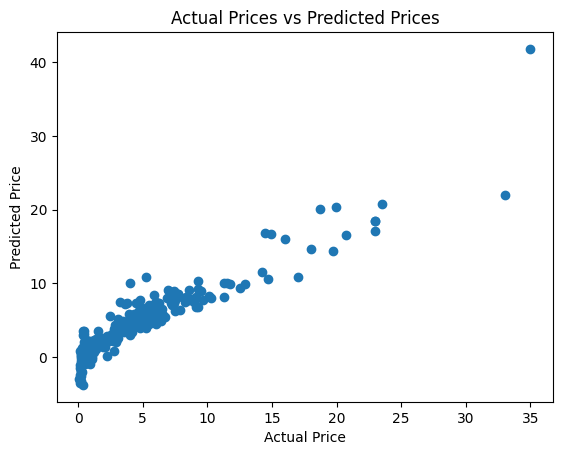

In [33]:
plt.scatter(y_train,train_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")

In [34]:
test_data_pred=lin_regression.predict(X_test)

In [35]:
error_score2=metrics.r2_score(y_test,test_data_pred)
print("R squared error :",error_score2)

R squared error : 0.8365861023209632


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

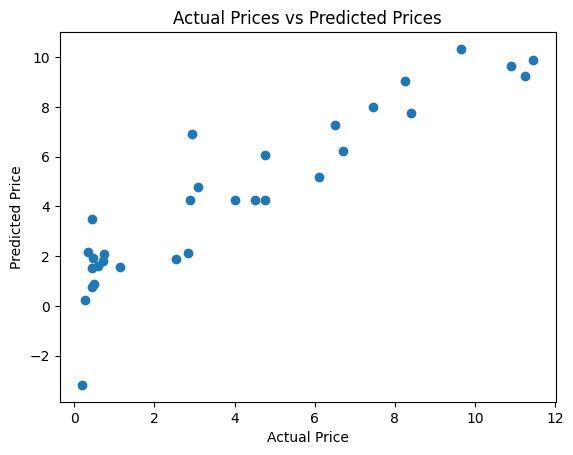

In [36]:
plt.scatter(y_test,test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")

In [37]:
lin_regression.score(X_test,y_test)

0.8365861023209632

# 2. lasso Regression

In [38]:
lasso_regression=Lasso()

In [39]:
lasso_regression.fit(X_train,y_train)

Lasso()

In [40]:
training_data_prediction=lasso_regression.predict(X_train)

In [41]:
error_score5=metrics.r2_score(y_train,training_data_prediction)

In [42]:
print("R squared error :",error_score5)

R squared error : 0.8499493610873642


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

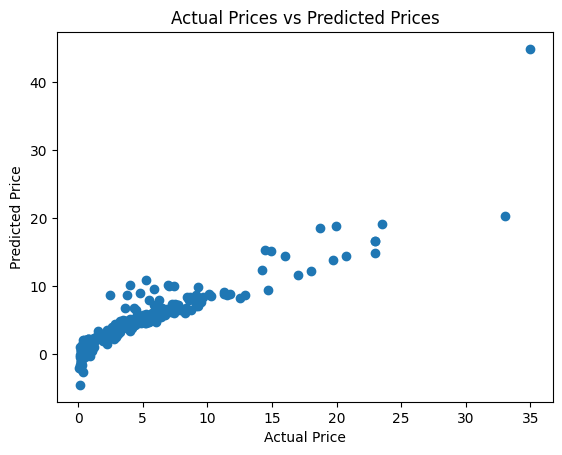

In [43]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")

In [44]:
test_data_pred3=lasso_regression.predict(X_test)

In [45]:
error_score6=metrics.r2_score(y_test,test_data_pred3)
print("R squared error :",error_score6)

R squared error : 0.9007682280755255


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

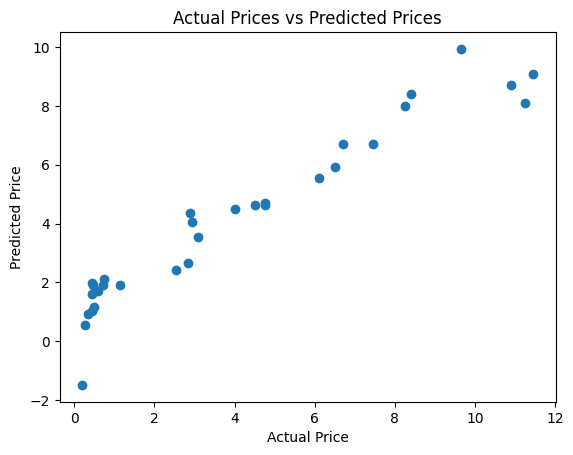

In [46]:
plt.scatter(y_test,test_data_pred3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")

In [47]:
lasso_regression.score(X_test,y_test)

0.9007682280755255

In [48]:
rfr=RandomForestRegressor()

In [49]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [50]:
train_data_pred=rfr.predict(X_train)

In [51]:
error_score3=metrics.r2_score(y_train,train_data_pred)

In [52]:
print("R squared error :",error_score3)

R squared error : 0.9881912932707844


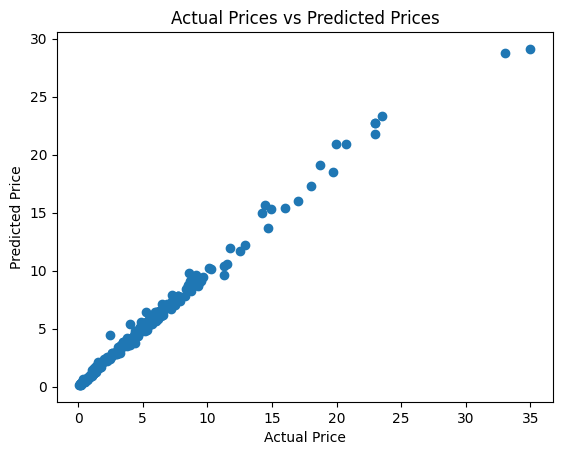

In [53]:
plt.scatter(y_train, train_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [54]:
test_data_pred2=rfr.predict(X_test)

In [55]:
test_data_pred2

array([ 8.6031,  0.5739,  3.934 ,  3.36  , 10.4188,  4.529 ,  3.173 ,
        6.9035,  0.2662,  5.581 ,  7.4239,  4.3525,  0.3371,  9.0635,
        2.4515,  0.8135,  0.6614,  0.4642, 10.6675,  4.0065,  1.282 ,
        8.065 ,  0.4583,  9.6581,  0.6342,  7.374 ,  0.6423,  0.1645,
        3.112 ,  2.391 ,  0.4607])

In [56]:
error_score4=metrics.r2_score(y_test,test_data_pred2)
print("R squared error :",error_score4)

R squared error : 0.9834358463417001


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

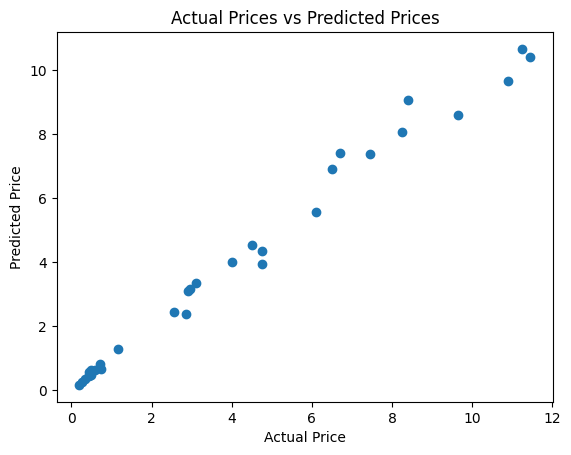

In [57]:
plt.scatter(y_test,test_data_pred2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")

In [58]:
rfr.score(X_test,y_test)

0.9834358463417001